In [1]:
import os
import re
import sys
import json
import random
random.seed(42)
from typing import Optional, Any
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

package_root = os.path.dirname(os.getcwd())
sys.path.insert(0, package_root)

import torch
torch.manual_seed(42)

import numpy as np
np.random.seed(42)

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
import matplotlib.patches as patches
import seaborn as sns

sns.set(font_scale=1.4)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})
%matplotlib inline

from entmax import sparsemax, entmax15, entmax_bisect
from torch.nn.functional import softmax, sigmoid

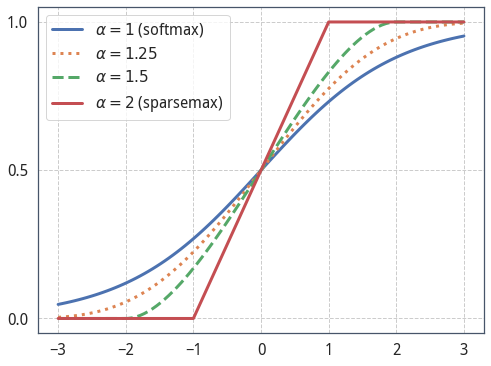

In [91]:
t = np.linspace(-3.0, 3.0, 100)
x = [[i, 0.0] for i in t]
x = torch.tensor(x)
softmax_y = softmax(x)
alpha125_y = entmax_bisect(x, 1.25)
alpha15_y = entmax_bisect(x, 1.5)
sparsemax_y = sparsemax(x)
# alpha4_y = entmax_bisect(x, 4)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t, softmax_y[:, 0], label=r"$\alpha = 1$ (softmax)", linewidth=3)
ax.plot(t, alpha125_y[:, 0], label=r"$\alpha = 1.25$", linewidth=3, linestyle=':')
ax.plot(t, alpha15_y[:, 0], label=r"$\alpha = 1.5$", linewidth=3, linestyle='--')
ax.plot(t, sparsemax_y[:, 0], label=r"$\alpha = 2$ (sparsemax)", linewidth=3)
# ax.plot(t, alpha4_y[:, 0], label=r"$\alpha = 4$", linewidth=1, color='k')
ax.set_yticks([0.0, 0.5, 1.0])
plt.legend()

fig.savefig("images/alpha_entmax_plot.png", bbox_inches="tight")
fig.savefig("images/alpha_entmax_plot.pdf", bbox_inches="tight")
